# PlantDoc Dataset – Exploratory Data Analysis (EDA)

This notebook performs a detailed exploratory data analysis on the PlantDoc dataset
to study class distribution, image dimensions, pixel statistics, and data quality.


In [3]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
DATASET_PATH = r"C:\Users\alann\OneDrive\Desktop\plantdisease\dataset\images\train"
print(DATASET_PATH)

C:\Users\alann\OneDrive\Desktop\plantdisease\dataset\images\train


## Loading the Dataset

In [5]:
class_names = [cls for cls in os.listdir(DATASET_PATH)
               if os.path.isdir(os.path.join(DATASET_PATH, cls))]

len(class_names), class_names

(38,
 ['Apple___Apple_scab',
  'Apple___Black_rot',
  'Apple___Cedar_apple_rust',
  'Apple___healthy',
  'Blueberry___healthy',
  'Cherry_(including_sour)___healthy',
  'Cherry_(including_sour)___Powdery_mildew',
  'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
  'Corn_(maize)___Common_rust_',
  'Corn_(maize)___healthy',
  'Corn_(maize)___Northern_Leaf_Blight',
  'Grape___Black_rot',
  'Grape___Esca_(Black_Measles)',
  'Grape___healthy',
  'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
  'Orange___Haunglongbing_(Citrus_greening)',
  'Peach___Bacterial_spot',
  'Peach___healthy',
  'Pepper,_bell___Bacterial_spot',
  'Pepper,_bell___healthy',
  'Potato___Early_blight',
  'Potato___healthy',
  'Potato___Late_blight',
  'Raspberry___healthy',
  'Soybean___healthy',
  'Squash___Powdery_mildew',
  'Strawberry___healthy',
  'Strawberry___Leaf_scorch',
  'Tomato___Bacterial_spot',
  'Tomato___Early_blight',
  'Tomato___healthy',
  'Tomato___Late_blight',
  'Tomato___Leaf_Mold',
  'Tomato

## Total Number of Images in Each Class

In [6]:
class_counts = {}

for cls in class_names:
    cls_path = os.path.join(DATASET_PATH, cls)
    class_counts[cls] = len(os.listdir(cls_path))

class_df = pd.DataFrame.from_dict(class_counts, orient="index", columns=["Image_Count"])
class_df

,Image_Count
Apple___Apple_scab,504
Apple___Black_rot,496
Apple___Cedar_apple_rust,220
Apple___healthy,1316
Blueberry___healthy,1202
Cherry_(including_sour)___healthy,684
Cherry_(including_sour)___Powdery_mildew,842
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot,410
Corn_(maize)___Common_rust_,953
Corn_(maize)___healthy,929


## Insight 1: Class Distribution Analysis

This analysis identifies potential class imbalance across disease categories.

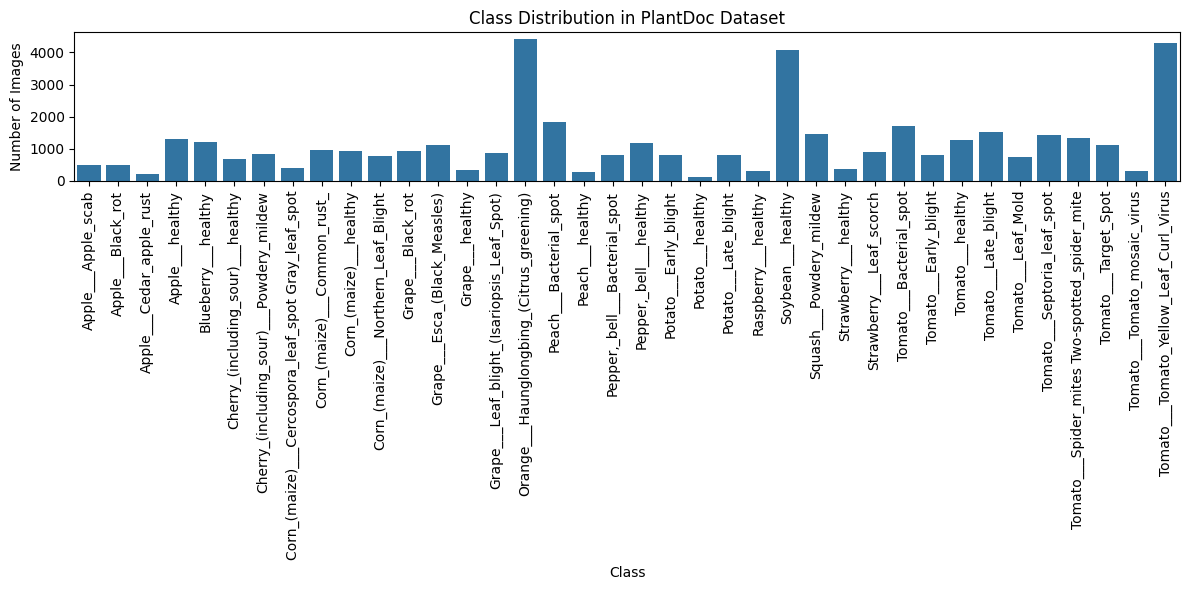

In [7]:
plt.figure(figsize=(12,6))
sns.barplot(x=class_df.index, y=class_df["Image_Count"])
plt.xticks(rotation=90)
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("Class Distribution in PlantDoc Dataset")
plt.tight_layout()
plt.show()

## Image Dimension Analysis (Width & Height)

In [8]:
image_info = []

for cls in class_names:
    cls_path = os.path.join(DATASET_PATH, cls)
    for img_name in os.listdir(cls_path):
        img_path = os.path.join(cls_path, img_name)
        try:
            with Image.open(img_path) as img:
                w, h = img.size
                image_info.append([cls, w, h])
        except:
            pass

dim_df = pd.DataFrame(image_info, columns=["Class", "Width", "Height"])
dim_df.head()

,Class,Width,Height
0,Apple___Apple_scab,256,256
1,Apple___Apple_scab,256,256
2,Apple___Apple_scab,256,256
3,Apple___Apple_scab,256,256
4,Apple___Apple_scab,256,256


## Distribution of Image Width and Height

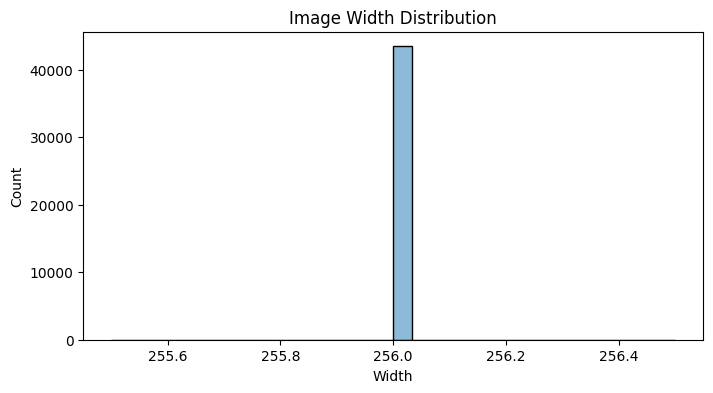

In [9]:
plt.figure(figsize=(8,4))
sns.histplot(dim_df["Width"], bins=30, kde=True)
plt.title("Image Width Distribution")
plt.show()

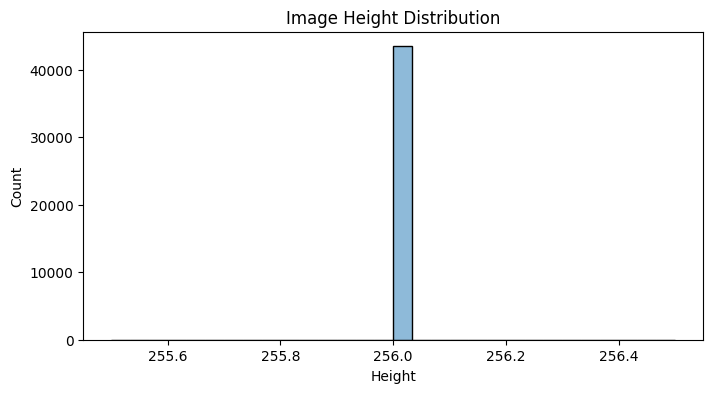

In [10]:
plt.figure(figsize=(8,4))
sns.histplot(dim_df["Height"], bins=30, kde=True)
plt.title("Image Height Distribution")
plt.show()

## Unique Image Resolution Analysis

In [11]:
unique_shapes = dim_df[["Width", "Height"]].drop_duplicates()

len(unique_shapes), unique_shapes.head(10)

(1,
    Width  Height
 0    256     256)

## Insight 2: Aspect Ratio Analysis

This analysis checks variation in spatial dimensions using aspect ratios.

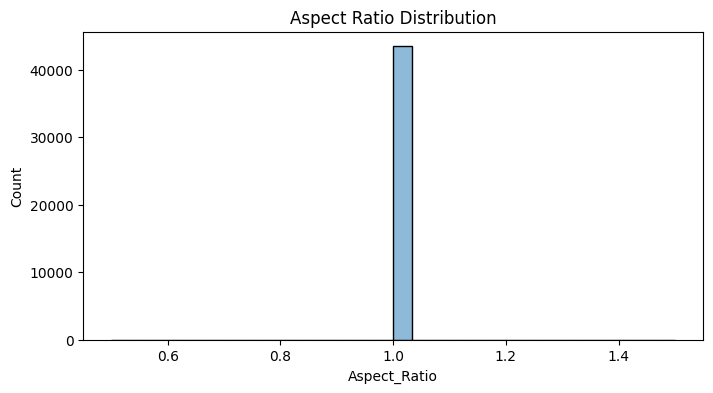

In [12]:
dim_df["Aspect_Ratio"] = dim_df["Width"] / dim_df["Height"]

plt.figure(figsize=(8,4))
sns.histplot(dim_df["Aspect_Ratio"], bins=30, kde=True)
plt.title("Aspect Ratio Distribution")
plt.show()

## Resizing Images to a Fixed Size

In [13]:
TARGET_SIZE = (224, 224)

img_path = os.path.join(DATASET_PATH, class_names[0],
                        os.listdir(os.path.join(DATASET_PATH, class_names[0]))[0])

img = Image.open(img_path)
img_resized = img.resize(TARGET_SIZE)

img.size, img_resized.size

((256, 256), (224, 224))

## Pixel Value Range Analysis

In [14]:
img_array = np.array(img)

img_array.min(), img_array.max()

(np.uint8(1), np.uint8(204))

## Normalizing Pixel Values (0–255 → 0–1)

In [15]:
img_normalized = img_array / 255.0

img_normalized.min(), img_normalized.max()

(np.float64(0.00392156862745098), np.float64(0.8))

## Color Space Analysis (RGB / Grayscale)

In [16]:
img_array.shape

(256, 256, 3)

## Visualizing Sample Images from Each Class

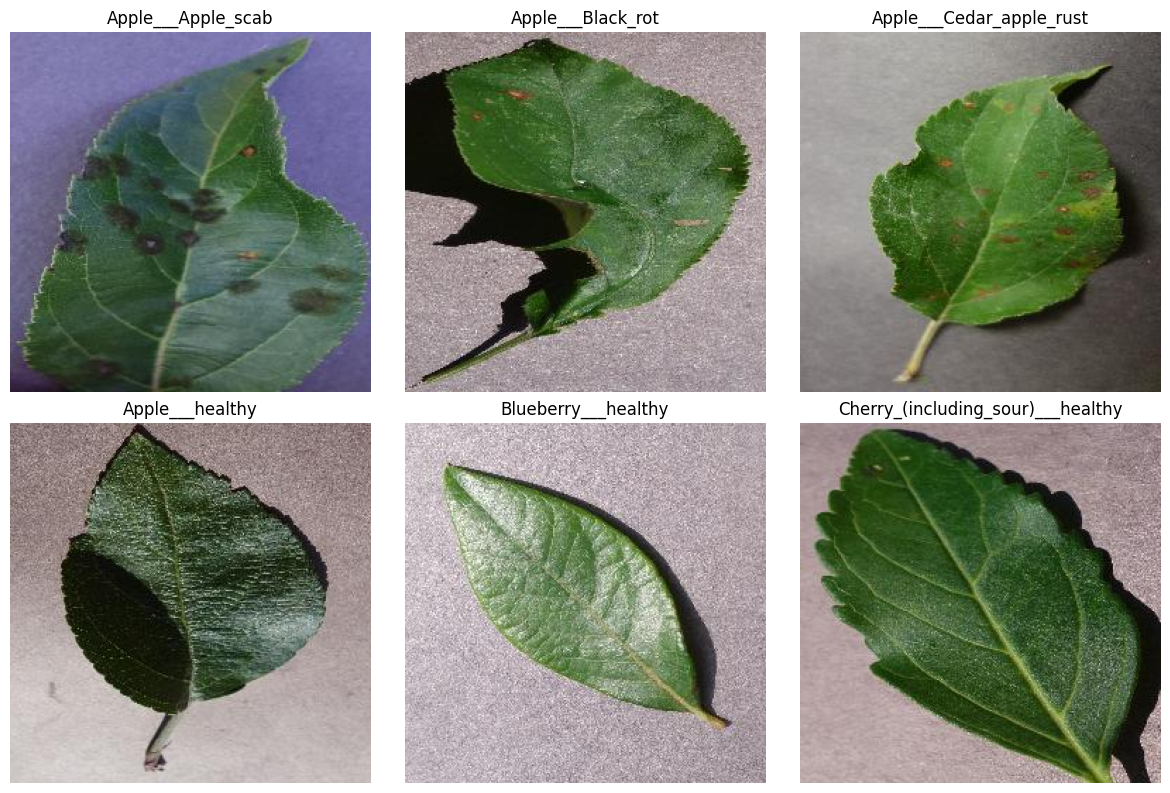

In [17]:
plt.figure(figsize=(12,8))

for i, cls in enumerate(class_names[:6]):
    img_path = os.path.join(DATASET_PATH, cls, os.listdir(os.path.join(DATASET_PATH, cls))[0])
    img = Image.open(img_path)
    plt.subplot(2,3,i+1)
    plt.imshow(img)
    plt.title(cls)
    plt.axis("off")

plt.tight_layout()
plt.show()

## Checking for Grayscale or Corrupt Images

In [18]:
grayscale_count = 0
corrupt_count = 0

for cls in class_names:
    for img_name in os.listdir(os.path.join(DATASET_PATH, cls)):
        img_path = os.path.join(DATASET_PATH, cls, img_name)
        try:
            img = Image.open(img_path)
            if img.mode != "RGB":
                grayscale_count += 1
        except:
            corrupt_count += 1

grayscale_count, corrupt_count

(1, 0)